## **선형회귀**



*   직관적이고 간단한 알고리즘
*   많은 데이터가 비례관계에 있어 효율이 좋음
*   단순선형회귀는 y=ax+b 꼴이고, 다중선형회귀는 특성들의 선형결합으로 이루어짐 





## **데이터 불러오고 분리하기**

In [1]:
import numpy as np
# 데이터 
fish_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

fish_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


In [2]:
from sklearn.model_selection import train_test_split 
train_X, test_X, train_Y, test_Y=train_test_split(
    fish_length, fish_weight, random_state=42
) 

# 2차원 배열로 전환 
train_X=train_X.reshape(-1,1)
test_X=test_X.reshape(-1,1)

## **선형회귀**

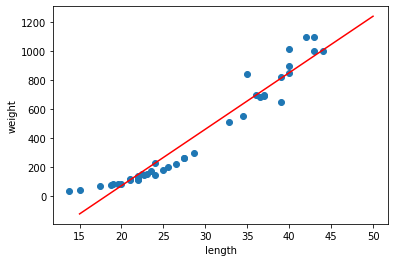

0.8247503123313558


In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#선형회귀
lr=LinearRegression() # 객체 생성
lr.fit(train_X, train_Y) # 훈련
a,b=lr.coef_, lr.intercept_ # a, b는 기울기, y절편
plt.scatter(train_X, train_Y) # 산점도 
plt.plot([15, 50], [15*a+b, 50*a+b], color='red') # 직선 그리기
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print(lr.score(test_X, test_Y)) # 성능 평가 

## **2차식 model 만들기**

(42, 2) (14, 2)


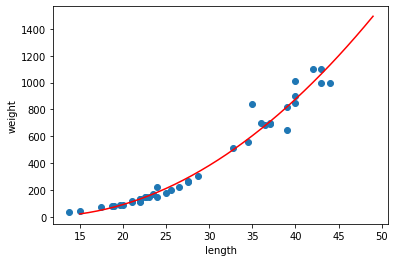

0.9706807451768623
0.9775935108325122


In [4]:

# 브로드 캐스팅 + 행렬 붙이기
train_poly=np.column_stack((train_X**2, train_X)) 
test_poly=np.column_stack((test_X**2, test_X)) 
print(train_poly.shape, test_poly.shape)

# 훈련 
lr=LinearRegression()
lr.fit(train_poly, train_Y)

# 최적의 상수
[c1, c2], c3=lr.coef_, lr.intercept_

# 그리기
P=np.arange(15, 50)
plt.scatter(train_X, train_Y)
plt.plot(P, c1*P**2+c2*P+c3, color='red')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 성능 평가 
print(lr.score(train_poly, train_Y))
print(lr.score(test_poly, test_Y))
